# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [2]:
#visualiación
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Exploratory Data Analysis 

In [9]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [11]:
df.rename(columns={"newpaper": "newspaper"}, inplace=True)

In [12]:
# Reemplaza todas las letras "s" en la columna 'newspaper' por vacío (las elimina)
df['newspaper'] = df['newspaper'].str.replace("s", "")

# Convierte los valores de la columna 'newspaper' al tipo de dato float
df['newspaper'] = df['newspaper'].astype(float)

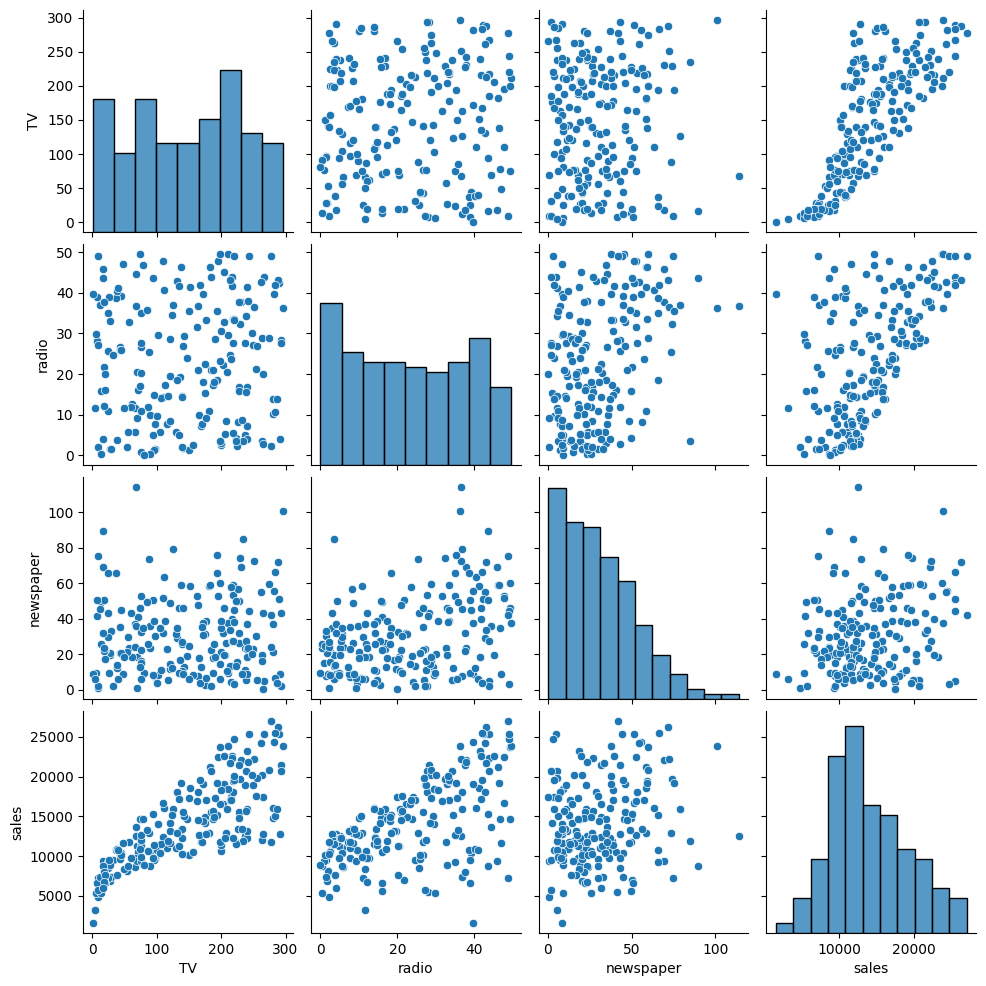

In [14]:
sns.pairplot(df)

<Axes: >

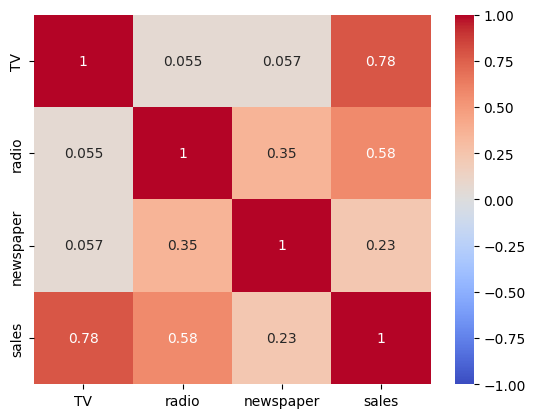

In [15]:
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm")

## Modelado

In [ ]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [ ]:
# Utiliza todas las celdas que necesites...

In [26]:
X = df[['TV', 'radio', 'newspaper']]
#X = df[['TV', 'radio']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = lr.predict(X_test)

print("R2 score", lr.score(X_test, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

R2 score 0.899438024100912
MAE 1460.7567168117605
MSE 3174097.3539761053
RMSE 1781.5996615334504


### ¿Qué es R²?

- **Definición:**  
  R² mide la proporción de la variación total de la variable objetivo que el modelo logra explicar.

- **Fórmula:**  
  \( R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \)  
  donde:  
  - \( SS_{res} \): suma de los errores al cuadrado (residuos).  
  - \( SS_{tot} \): variación total respecto al valor medio real.

- **Interpretación:**
  - **R² = 1:** el modelo predice perfectamente los datos.  
  - **R² = 0:** el modelo no explica mejor que usar la media de los datos.  
  - **R² < 0:** el modelo es peor que simplemente usar la media (mal ajuste).

- **Ejemplo:**
  Si \( R^2 = 0.85 \), significa que el modelo explica el **85 % de la variabilidad** de los datos reales.

- **Nota:**  
  Un R² alto no siempre implica un buen modelo; puede indicar **sobreajuste** si el modelo se adapta demasiado a los datos de entrenamiento.


In [29]:
def train_eval_model(X_train, X_test, y_train, y_test, model):
    # Entrena el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realiza predicciones con los datos de prueba
    y_pred = model.predict(X_test)

    # Imprime el R² (qué proporción de la varianza explica el modelo)
    print("R2 score", model.score(X_test, y_test))

    # Imprime el Error Absoluto Medio (MAE): promedio de errores absolutos
    print("MAE", mean_absolute_error(y_test, y_pred))

    # Imprime el Error Cuadrático Medio (MSE): penaliza más los errores grandes
    print("MSE", mean_squared_error(y_test, y_pred))

    # Imprime la Raíz del MSE (RMSE): error promedio en la misma escala que la variable objetivo
    print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

    # Grafica un histograma de los residuos (diferencia entre predicciones y valores reales)
    sns.displot(y_pred - y_test)

    # Retorna el modelo ya entrenado
    return model

R2 score 0.899438024100912
MAE 1460.7567168117605
MSE 3174097.3539761053
RMSE 1781.5996615334504


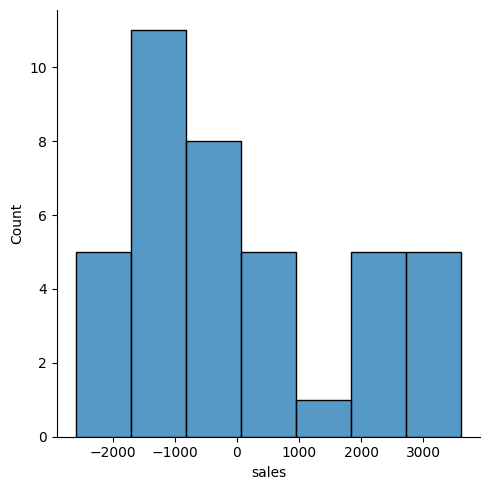

In [30]:
model_1 = train_eval_model(X_train, X_test, y_train, y_test, lr) 

In [31]:
# Crea un objeto para escalar los datos (normalización con media=0 y desviación=1)
scaler = StandardScaler()

# Ajusta el escalador con X_train y transforma los datos de entrenamiento
X_train_scal = scaler.fit_transform(X_train)

# Transforma los datos de prueba usando el mismo escalador
X_test_scal = scaler.transform(X_test)

R2 score 0.8994380241009119
MAE 1460.7567168117607
MSE 3174097.353976108
RMSE 1781.5996615334514


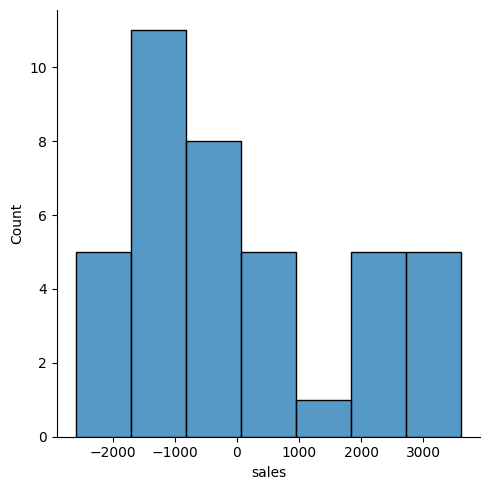

In [32]:
model_2 = train_eval_model(X_train_scal, X_test_scal, y_train, y_test, lr)

###  Métodos de escalado y normalización en Machine Learning

#### 1. **StandardScaler**
- Transforma los datos para que tengan **media = 0** y **desviación estándar = 1**.
- Útil para modelos que asumen distribución normal (como regresión lineal, SVM, PCA).

#### 2. **MinMaxScaler**
- Escala los valores a un **rango específico** (por defecto [0, 1]).
- Útil cuando se necesita mantener la forma de la distribución (redes neuronales, KNN).

#### 3. **MaxAbsScaler**
- Escala los valores dividiendo por el **valor absoluto máximo** de cada característica.
- Ideal para datos **centrados en 0** o con **valores positivos y negativos balanceados**.

#### 4. **RobustScaler**
- Usa la **mediana** y el **rango intercuartílico (IQR)**.
- Menos sensible a **outliers** que `StandardScaler`.

#### 5. **Normalizer**
- Normaliza **filas completas** (vectores) para que tengan **longitud 1** (norma L2, L1, etc.).
- Útil en **modelos basados en distancias** (por ejemplo, KNN o clustering).

#### 6. **QuantileTransformer**
- Transforma los datos para seguir una **distribución uniforme o normal**.
- Muy útil si la distribución original es **muy sesgada**.

#### 7. **PowerTransformer**
- Aplica una **transformación no lineal (Box-Cox o Yeo-Johnson)** para hacer los datos más gaussianos.
- Ayuda cuando los datos tienen **heterocedasticidad** o colas largas.

---

###  En resumen
| Método | Tipo de escalado | Tolerancia a outliers | Mantiene forma de distribución |
|---------|------------------|------------------------|--------------------------------|
| StandardScaler | Media 0, varianza 1 | ❌ | ✅ Aproximadamente |
| MinMaxScaler | Rango [0, 1] | ❌ | ✅ |
| MaxAbsScaler | Divide por valor máximo | ❌ | ✅ |
| RobustScaler | Basado en mediana/IQR | ✅ | ✅ |
| Normalizer | Vector de norma 1 | ✅ | ❌ |
| QuantileTransformer | Uniforme o normal | ✅ | ❌ |
| PowerTransformer | Normalización gaussiana | ✅ | ❌ |


In [33]:
# Crea un objeto MinMaxScaler (escala los datos en un rango, por defecto [0, 1])
scaler = MinMaxScaler()

# Ajusta el escalador con los datos de entrenamiento y transforma X_train al rango [0, 1]
X_train_scal = scaler.fit_transform(X_train)

# Aplica la misma transformación al conjunto de prueba (usando los parámetros de entrenamiento)
X_test_scal = scaler.transform(X_test) 

In [34]:
# Muestra el valor mínimo de los datos escalados (debería ser 0.0)
print(X_train_scal.min())

# Muestra el valor máximo de los datos escalados (debería ser 1.0)
print(X_train_scal.max())

0.0
1.0


R2 score 0.899438024100912
MAE 1460.7567168117605
MSE 3174097.3539761053
RMSE 1781.5996615334504


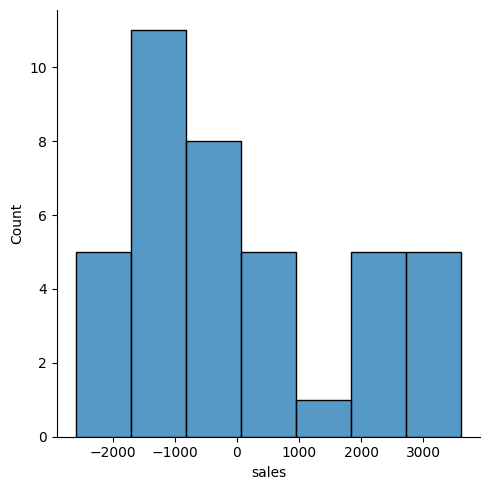

In [41]:
# Selecciona solo las variables 'TV' y 'radio' como predictores
X = df[['TV', 'radio', 'newspaper']]

# Define la variable objetivo 'sales'
y = df['sales']

# Divide los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena y evalúa un tercer modelo usando solo 'TV' y 'radio'
model_3 = train_eval_model(X_train, X_test, y_train, y_test, lr)

#### Debemos de aumentar o reducir la la complejidad de nuestros modelos?

R2 score 0.8992633013392961
MAE 1469.1724250529444
MSE 3179612.232242625
RMSE 1783.146722017744


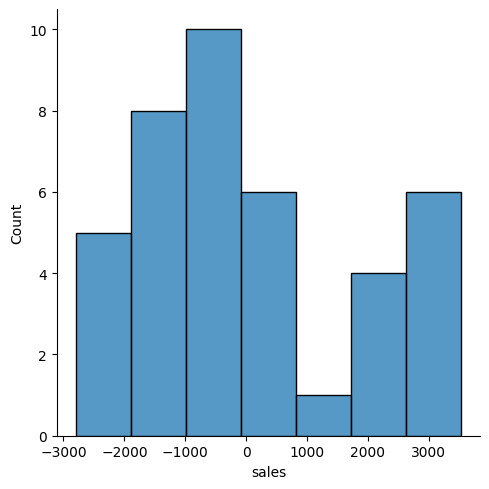

In [42]:
model_4 = train_eval_model(X_train, X_test, y_train, y_test, Ridge(alpha=1000))

R2 score 0.9869181490609594
MAE 526.1794444044102
MSE 412910.22853793425
RMSE 642.580912055388


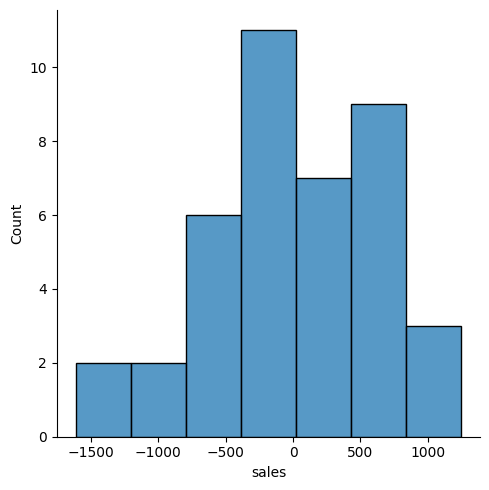

In [43]:
# Crea un generador de características polinómicas de grado 2
# (incluye términos cuadrados y combinaciones de las variables)
pol_2 = PolynomialFeatures(degree=2)

# Ajusta y transforma los datos de entrenamiento a su versión polinómica
X_train_pol2 = pol_2.fit_transform(X_train)

# Transforma los datos de prueba con las mismas características polinómicas
X_test_pol2 = pol_2.transform(X_test)

# Entrena y evalúa un modelo de regresión lineal con las nuevas características polinómicas
model_5 = train_eval_model(X_train_pol2, X_test_pol2, y_train, y_test, LinearRegression())

R2 score 0.9906674629201926
MAE 388.68170480525
MSE 294568.40904385265
RMSE 542.7415674553154


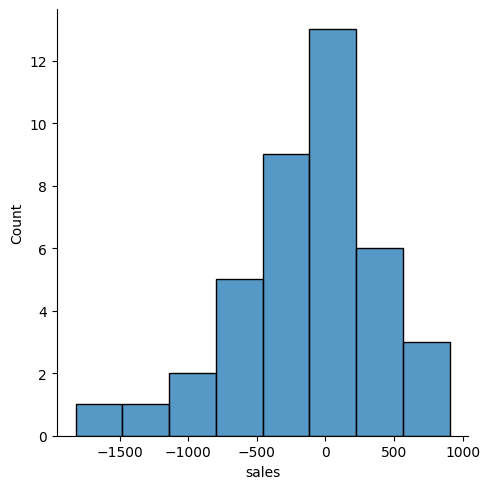

In [44]:
# Crea un generador de características polinómicas de grado 2
# (incluye términos cuadrados y combinaciones de las variables)
pol_2 = PolynomialFeatures(degree=3)

# Ajusta y transforma los datos de entrenamiento a su versión polinómica
X_train_pol2 = pol_2.fit_transform(X_train)

# Transforma los datos de prueba con las mismas características polinómicas
X_test_pol2 = pol_2.transform(X_test)

# Entrena y evalúa un modelo de regresión lineal con las nuevas características polinómicas
model_5 = train_eval_model(X_train_pol2, X_test_pol2, y_train, y_test, LinearRegression())

R2 score 0.980422028994532
MAE 544.2500063275209
MSE 617951.123265871
RMSE 786.09867272873


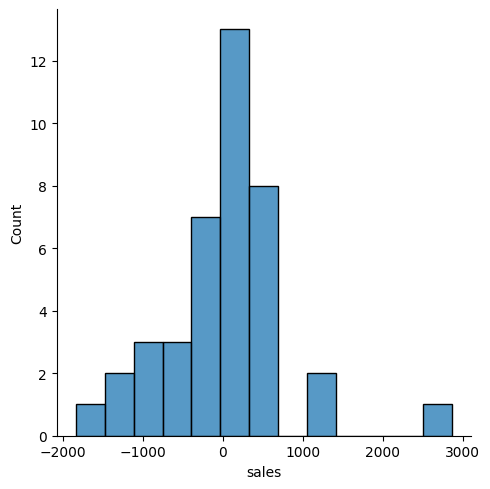

In [45]:
# Crea un generador de características polinómicas de grado 2
# (incluye términos cuadrados y combinaciones de las variables)
pol_2 = PolynomialFeatures(degree=4)

# Ajusta y transforma los datos de entrenamiento a su versión polinómica
X_train_pol2 = pol_2.fit_transform(X_train)

# Transforma los datos de prueba con las mismas características polinómicas
X_test_pol2 = pol_2.transform(X_test)

# Entrena y evalúa un modelo de regresión lineal con las nuevas características polinómicas
model_5 = train_eval_model(X_train_pol2, X_test_pol2, y_train, y_test, LinearRegression())

## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [ ]:
# Utiliza todas las celdas que necesites...